In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

In [22]:
# Load data
df = pd.read_excel('CWRU_Comparison_Data.xlsx', sheet_name='Sheet2')

In [23]:
df.head()

,Year,School_Name,Acceptance_Rate,Accepted,SAT_Scores,Cost_of_Living,Net_Price,Retention_Rate,Grad_Rate_4yr,Grad_Rate_5yr,Grad_Rate_6yr,Expense_Distribution_Research,Research_Budget_Per_Student,Student_Faculty_Ratio
0,2023-24,Case Western Reserve University,28,11193,1490,86073,41351,92,67,84,85,42,38921,9
1,2023-24,Tufts University,10,3444,1510,88300,33333,96,89,94,94,18,13573,10
2,2023-24,Vanderbilt University,6,2844,1540,89590,26689,96,89,93,94,16,18671,8
3,2023-24,Georgetown University,13,3334,1500,88741,37967,97,90,95,96,18,18098,11
4,2023-24,University of Notre Dame,12,3510,1500,83271,29083,98,89,96,96,16,14154,8


In [25]:
# Acceptance_Rate, Enrollment, Cost_of_Living, Net_Price and Student_Faculty_Ratio
# 1. Invert lower-is-better metrics
df["Selectivity_Score"]      = 1 / df["Acceptance_Rate"]
df["Acceptance_Score"]       = 1 / df["Accepted"]
df["Affordability_Score"]    = 1 / df["Cost_of_Living"]
df["Value_Score"]            = 1 / df["Net_Price"]
df["Faculty_Access_Score"]   = 1 / df["Student_Faculty_Ratio"]

## 2. Graduation composite
# df["OverallGradRate"] = (
#     df["Grad_Rate_4yr"]*0.5 
#     + df["Grad_Rate_5yr"]*0.25 
#     + df["Grad_Rate_6yr"]*0.25
# )

In [26]:
def minmax(col):
    return (col - col.min()) / (col.max() - col.min())

cols_to_normalize = [
    "Selectivity_Score",
    "Acceptance_Score",
    "Affordability_Score",
    "Value_Score",
    "Faculty_Access_Score",
    "SAT_Scores",
    "Retention_Rate",
    #    "OverallGradRate",
    "Grad_Rate_4yr",
    "Grad_Rate_5yr",
    "Grad_Rate_5yr",
    "Expense_Distribution_Research",
    "Research_Budget_Per_Student"
]

for col in cols_to_normalize:
    df[col + "_Norm"] = minmax(df[col])

In [27]:
df.columns

Index(['Year', 'School_Name', 'Acceptance_Rate', 'Accepted', 'SAT_Scores',
       'Cost_of_Living', 'Net_Price', 'Retention_Rate', 'Grad_Rate_4yr',
       'Grad_Rate_5yr', 'Grad_Rate_6yr', 'Expense_Distribution_Research',
       'Research_Budget_Per_Student', 'Student_Faculty_Ratio',
       'Selectivity_Score', 'Enrollment_Score', 'Affordability_Score',
       'Value_Score', 'Faculty_Access_Score', 'Acceptance_Score',
       'Selectivity_Score_Norm', 'Acceptance_Score_Norm',
       'Affordability_Score_Norm', 'Value_Score_Norm',
       'Faculty_Access_Score_Norm', 'SAT_Scores_Norm', 'Retention_Rate_Norm',
       'Grad_Rate_4yr_Norm', 'Grad_Rate_5yr_Norm',
       'Expense_Distribution_Research_Norm',
       'Research_Budget_Per_Student_Norm'],
      dtype='object')

In [28]:
df[[
    'Selectivity_Score_Norm', 'Acceptance_Score_Norm', 'Affordability_Score_Norm',
    'Value_Score_Norm','Faculty_Access_Score_Norm','SAT_Scores_Norm',
    'Retention_Rate_Norm','Grad_Rate_4yr_Norm','Grad_Rate_5yr_Norm',
    'Expense_Distribution_Research_Norm','Research_Budget_Per_Student_Norm'
]].describe()

,Selectivity_Score_Norm,Acceptance_Score_Norm,Affordability_Score_Norm,Value_Score_Norm,Faculty_Access_Score_Norm,SAT_Scores_Norm,Retention_Rate_Norm,Grad_Rate_4yr_Norm,Grad_Rate_5yr_Norm,Expense_Distribution_Research_Norm,Research_Budget_Per_Student_Norm
count,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000
mean,0.429905,0.446979,0.166868,0.426710,0.479695,0.677656,0.630769,0.731809,0.678322,0.496337,0.293684
std,0.337353,0.344545,0.265179,0.323055,0.307154,0.290407,0.337601,0.301054,0.304048,0.275074,0.257665
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.101732,0.175404,0.041434,0.163668,0.318182,0.619048,0.400000,0.621622,0.454545,0.380952,0.189187
50%,0.461039,0.276913,0.086218,0.363126,0.500000,0.761905,0.800000,0.837838,0.818182,0.428571,0.212868
75%,0.568831,0.719239,0.133837,0.619203,0.625000,0.809524,0.900000,0.972973,0.909091,0.714286,0.322884
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [45]:
df_metric = df[[
    'School_Name', 'Selectivity_Score_Norm', 'Acceptance_Score_Norm', 'Affordability_Score_Norm',
    'Value_Score_Norm','Faculty_Access_Score_Norm','SAT_Scores_Norm',
    'Retention_Rate_Norm','Grad_Rate_5yr_Norm', 'Expense_Distribution_Research_Norm',
    'Research_Budget_Per_Student_Norm'
]]

 #'Grad_Rate_4yr_Norm'

In [46]:
df_metric

,School_Name,Selectivity_Score_Norm,Acceptance_Score_Norm,Affordability_Score_Norm,Value_Score_Norm,Faculty_Access_Score_Norm,SAT_Scores_Norm,Retention_Rate_Norm,Grad_Rate_5yr_Norm,Expense_Distribution_Research_Norm,Research_Budget_Per_Student_Norm
0,Case Western Reserve University,0.153061,0.175404,0.109291,0.163668,0.500000,0.714286,0.4,0.454545,1.000000,0.542498
1,Tufts University,0.568831,0.694501,0.052367,0.363126,0.400000,0.809524,0.8,0.909091,0.428571,0.189187
2,Vanderbilt University,1.000000,0.852688,0.020689,0.619203,0.625000,0.952381,0.8,0.863636,0.380952,0.260245
3,Georgetown University,0.419580,0.719239,0.041434,0.237575,0.318182,0.761905,0.9,0.954545,0.428571,0.252258
4,University of Notre Dame,0.461039,0.680402,0.185238,0.513448,0.625000,0.761905,1.0,1.000000,0.380952,0.197285
5,University of Rochester,0.101732,0.276913,0.086218,0.172811,0.500000,0.666667,0.5,0.545455,0.714286,0.453780
6,University of Southern California,0.568831,0.263737,0.000000,0.160770,0.625000,0.809524,0.9,0.818182,0.404762,0.212868
7,Fordham University,0.037570,0.049783,0.021052,0.090248,0.142857,0.285714,0.0,0.409091,0.000000,0.000000
8,Rice University,0.846011,1.000000,0.334047,1.000000,1.000000,1.000000,1.0,0.818182,0.571429,0.322884
9,Duke University,0.846011,0.765786,0.083396,0.798404,1.000000,1.000000,0.8,1.000000,0.857143,1.000000


# Equal Factor weighing

In [47]:
df_metric["Quality_Equal"] = df_metric.mean(axis=1)

In [48]:
df_metric

,School_Name,Selectivity_Score_Norm,Acceptance_Score_Norm,Affordability_Score_Norm,Value_Score_Norm,Faculty_Access_Score_Norm,SAT_Scores_Norm,Retention_Rate_Norm,Grad_Rate_5yr_Norm,Expense_Distribution_Research_Norm,Research_Budget_Per_Student_Norm,Quality_Equal
0,Case Western Reserve University,0.153061,0.175404,0.109291,0.163668,0.500000,0.714286,0.4,0.454545,1.000000,0.542498,0.421275
1,Tufts University,0.568831,0.694501,0.052367,0.363126,0.400000,0.809524,0.8,0.909091,0.428571,0.189187,0.521520
2,Vanderbilt University,1.000000,0.852688,0.020689,0.619203,0.625000,0.952381,0.8,0.863636,0.380952,0.260245,0.637479
3,Georgetown University,0.419580,0.719239,0.041434,0.237575,0.318182,0.761905,0.9,0.954545,0.428571,0.252258,0.503329
4,University of Notre Dame,0.461039,0.680402,0.185238,0.513448,0.625000,0.761905,1.0,1.000000,0.380952,0.197285,0.580527
5,University of Rochester,0.101732,0.276913,0.086218,0.172811,0.500000,0.666667,0.5,0.545455,0.714286,0.453780,0.401786
6,University of Southern California,0.568831,0.263737,0.000000,0.160770,0.625000,0.809524,0.9,0.818182,0.404762,0.212868,0.476367
7,Fordham University,0.037570,0.049783,0.021052,0.090248,0.142857,0.285714,0.0,0.409091,0.000000,0.000000,0.103631
8,Rice University,0.846011,1.000000,0.334047,1.000000,1.000000,1.000000,1.0,0.818182,0.571429,0.322884,0.789255
9,Duke University,0.846011,0.765786,0.083396,0.798404,1.000000,1.000000,0.8,1.000000,0.857143,1.000000,0.815074


In [49]:
print(df_metric[["School_Name","Quality_Equal"]])

                          School_Name  Quality_Equal
0     Case Western Reserve University       0.421275
1                    Tufts University       0.521520
2               Vanderbilt University       0.637479
3               Georgetown University       0.503329
4            University of Notre Dame       0.580527
5             University of Rochester       0.401786
6   University of Southern California       0.476367
7                  Fordham University       0.103631
8                     Rice University       0.789255
9                     Duke University       0.815074
10                Syracuse University       0.128362
11                  Boston University       0.434066
12             University of Colorado       0.332330


# Unequal factor weighing

In [52]:
# --- Category groupings ---
academic_cols = [
    "Faculty_Access_Score_Norm",
    "Acceptance_Score_Norm",
    "SAT_Scores_Norm"
]

outcome_cols = [
    "Retention_Rate_Norm",
#    "Grad_Rate_4yr_Norm",
    "Grad_Rate_5yr_Norm",
    "Selectivity_Score_Norm"
]

affordability_cols = [
    "Value_Score_Norm",
    "Affordability_Score_Norm"
]

research_cols = [
    "Expense_Distribution_Research_Norm",
    "Research_Budget_Per_Student_Norm"
]

# --- Compute category scores as row-wise means ---
df_metric["Academic_Score"]      = df_metric[academic_cols].mean(axis=1)
df_metric["Outcome_Score"]       = df_metric[outcome_cols].mean(axis=1)
df_metric["Affordability_Score"] = df_metric[affordability_cols].mean(axis=1)
df_metric["Research_Score"]      = df_metric[research_cols].mean(axis=1)

# --- Weights for each category ---
w_academic      = 0.30
w_outcomes      = 0.10
w_affordability = 0.20
w_research      = 0.40

# --- Weighted quality score ---
df_metric["Quality_Weighted"] = (
    w_academic      * df_metric["Academic_Score"] +
    w_outcomes      * df_metric["Outcome_Score"] +
    w_affordability * df_metric["Affordability_Score"] +
    w_research      * df_metric["Research_Score"]
)

In [53]:
# Sort by each metric to compare
print("=== Equal-weight ranking ===")
print(df_metric[["School_Name", "Quality_Equal"]]
      .sort_values("Quality_Equal", ascending=False))

print("\n=== Weighted ranking ===")
print(df_metric[["School_Name", "Quality_Weighted"]]
      .sort_values("Quality_Weighted", ascending=False))

# Optional: compare both scores side by side
df_metric[["School_Name", "Quality_Equal", "Quality_Weighted"]].sort_values(
    "Quality_Weighted", ascending=False
)

=== Equal-weight ranking ===
                          School_Name  Quality_Equal
9                     Duke University       0.815074
8                     Rice University       0.789255
2               Vanderbilt University       0.637479
4            University of Notre Dame       0.580527
1                    Tufts University       0.521520
3               Georgetown University       0.503329
6   University of Southern California       0.476367
11                  Boston University       0.434066
0     Case Western Reserve University       0.421275
5             University of Rochester       0.401786
12             University of Colorado       0.332330
10                Syracuse University       0.128362
7                  Fordham University       0.103631

=== Weighted ranking ===
                          School_Name  Quality_Weighted
9                     Duke University          0.824387
8                     Rice University          0.701074
2               Vanderbilt Universi

,School_Name,Quality_Equal,Quality_Weighted
9,Duke University,0.815074,0.824387
8,Rice University,0.789255,0.701074
2,Vanderbilt University,0.637479,0.524023
0,Case Western Reserve University,0.421275,0.508351
4,University of Notre Dame,0.580527,0.474281
5,University of Rochester,0.401786,0.442114
1,Tufts University,0.521520,0.431434
12,University of Colorado,0.332330,0.420240
3,Georgetown University,0.503329,0.419804
6,University of Southern California,0.476367,0.385663


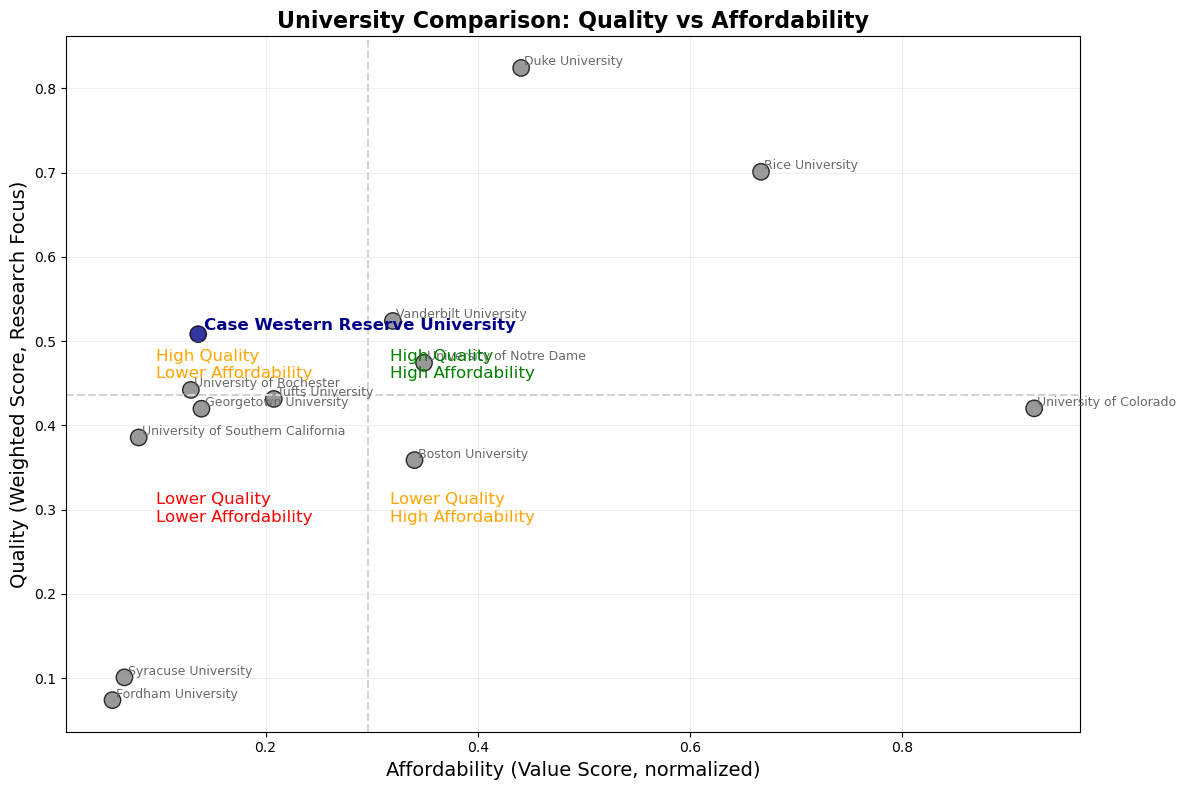

In [55]:
plt.figure(figsize=(12, 8))

# Axes
x = df_metric["Affordability_Score"]
y = df_metric["Quality_Weighted"]

# Highlight CWRU
colors = []
for u in df_metric["School_Name"]:
    if u == "Case Western Reserve University":
        colors.append("darkblue")
    else:
        colors.append("gray")

# Scatter plot
plt.scatter(x, y, s=140, alpha=0.8, c=colors, edgecolor="black")

# Label each point
for i, row in df_metric.iterrows():
    if row["School_Name"] == "Case Western Reserve University":
        plt.text(row["Affordability_Score"] + 0.005, row["Quality_Weighted"] + 0.005,
                 row["School_Name"], fontsize=12, color="darkblue", fontweight="bold")
    else:
        plt.text(row["Affordability_Score"] + 0.003, row["Quality_Weighted"] + 0.003,
                 row["School_Name"], fontsize=9, color="dimgray")

# Add quadrant lines for visual grouping
plt.axvline(np.mean(x), color="lightgray", linestyle="--")
plt.axhline(np.mean(y), color="lightgray", linestyle="--")

# Quadrant labels
plt.text(np.mean(x) + 0.02, np.mean(y) + 0.02,
         "High Quality\nHigh Affordability",
         fontsize=12, color="green")
plt.text(np.mean(x) - 0.2, np.mean(y) + 0.02,
         "High Quality\nLower Affordability",
         fontsize=12, color="orange")
plt.text(np.mean(x) + 0.02, np.mean(y) - 0.15,
         "Lower Quality\nHigh Affordability",
         fontsize=12, color="orange")
plt.text(np.mean(x) - 0.2, np.mean(y) - 0.15,
         "Lower Quality\nLower Affordability",
         fontsize=12, color="red")

# Titles + axis labels
plt.title("University Comparison: Quality vs Affordability", fontsize=16, fontweight="bold")
plt.xlabel("Affordability (Value Score, normalized)", fontsize=14)
plt.ylabel("Quality (Weighted Score, Research Focus)", fontsize=14)

plt.grid(alpha=0.2)
plt.tight_layout()
plt.show()